In [ ]:
import pandas as pd
import zipfile
import os

# Paths to the zip files
cyclone_zip_path = '/content/cyclone_dataset.zip'
temp_zip_path = '/content/temp_dataset.zip'

# Directories to store extracted files temporarily
cyclone_extract_dir = 'Cyclone_Files'
temp_extract_dir = 'Temp_Files'

# Function to extract zip files
def extract_zip(zip_path, extract_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

# Extract cyclone and temperature datasets
extract_zip(cyclone_zip_path, cyclone_extract_dir)
extract_zip(temp_zip_path, temp_extract_dir)

# Load all cyclone dataset files into DataFrames
cyclone_data = {}
for filename in os.listdir(cyclone_extract_dir):
    file_path = os.path.join(cyclone_extract_dir, filename)
    cyclone_data[filename] = pd.read_csv(file_path)

# Load all temperature dataset files into DataFrames
temp_data = {}
for filename in os.listdir(temp_extract_dir):
    file_path = os.path.join(temp_extract_dir, filename)
    temp_data[filename] = pd.read_csv(file_path)

# Check the structure of one of the loaded datasets
print(cyclone_data.keys())
print(cyclone_data['dist_monsoon.csv'].head())
print(temp_data.keys())
print(temp_data['annual_max.csv'].head())


dict_keys(['severe_post_monsoon.csv', 'severe_winter.csv', 'severe_monsoon.csv', 'dist_pre_monsoon.csv', 'dist_post_monsoon.csv', 'annual_frequency.csv', 'dist_monsoon.csv', 'dist_winter.csv', 'severe_pre_monsoon.csv'])
   Year  June: BOB  June: AS  June: LAND  June: TOTAL  July: BOB  July: AS  \
0  1891          0         0           0            0          0         0   
1  1892          1         1           0            2          1         0   
2  1893          1         0           1            2          1         0   
3  1894          1         0           1            2          3         0   
4  1895          2         1           0            3          2         0   

   July: LAND  July: TOTAL  August: BOB  ...  August: LAND  August: TOTAL  \
0           1            1            1  ...             1              2   
1           2            3            1  ...             0              1   
2           0            1            0  ...             0              0   
3  

In [ ]:
for filename, df in cyclone_data.items():
    print(f"Columns in {filename}: {df.columns}")


Columns in severe_post_monsoon.csv: Index(['Year', 'October: BOB', 'October: AS', 'October: LAND',
       'October: TOTAL', 'November: BOB', 'November: AS', 'November: LAND',
       'November: TOTAL', 'December: BOB', 'December: AS', 'December: LAND',
       'December: TOTAL', 'October- December: BOB', 'October- December: AS',
       'October- December: LAND', 'October- December: TOTAL'],
      dtype='object')
Columns in severe_winter.csv: Index(['Year', 'January: BOB', 'January: AS', 'January: LAND',
       'January: TOTAL', 'February: BOB', 'February: AS', 'February: LAND',
       'February: TOTAL', 'January-February: BOB', 'January-February: AS',
       'January-February: LAND', 'January-February: TOTAL'],
      dtype='object')
Columns in severe_monsoon.csv: Index(['Year', 'June: BOB', 'June: AS', 'June: LAND', 'June: TOTAL',
       'July: BOB', 'July: AS', 'July: LAND', 'July: TOTAL', 'August: BOB',
       'August: AS', 'August: LAND', 'August: TOTAL', 'September: BOB',
       'Sep

In [ ]:
import pandas as pd

# List of CSV files and their corresponding season names
files_and_seasons = [
    ('Cyclone_Files/dist_winter.csv', 'winter: TOTAL'),
    ('Cyclone_Files/severe_winter.csv', 'winter: TOTAL'),
    ('Cyclone_Files/dist_pre_monsoon.csv', 'pre_monsoon: TOTAL'),
    ('Cyclone_Files/severe_pre_monsoon.csv', 'pre_monsoon: TOTAL'),
    ('Cyclone_Files/dist_monsoon.csv', 'monsoon: TOTAL'),
    ('Cyclone_Files/severe_monsoon.csv', 'monsoon: TOTAL'),
    ('Cyclone_Files/dist_post_monsoon.csv', 'post_monsoon: TOTAL'),
    ('Cyclone_Files/severe_post_monsoon.csv', 'post_monsoon: TOTAL'),
    ('Cyclone_Files/annual_frequency.csv', 'annual: TOTAL')
]

# Process each file
for file_name, new_column_name in files_and_seasons:
    # Load the CSV file
    df = pd.read_csv(file_name)

    # Rename the last column
    last_column_index = df.columns[-1]  # Get the last column name
    df.rename(columns={last_column_index: new_column_name}, inplace=True)

    # Optionally, save the modified DataFrame back to a CSV file
    df.to_csv(file_name, index=False)  # Overwrites the original file

    # Print the modified columns for confirmation
    print(f'Modified {file_name}:')
    print(df.columns.tolist())


Modified Cyclone_Files/dist_winter.csv:
['Year', 'January: BOB', 'January: AS', 'January: LAND', 'January: TOTAL', 'February: BOB', 'February: AS', 'February: LAND', 'February: TOTAL', 'January-February: BOB', 'January-February: AS', 'January-February: LAND', 'winter: TOTAL']
Modified Cyclone_Files/severe_winter.csv:
['Year', 'January: BOB', 'January: AS', 'January: LAND', 'January: TOTAL', 'February: BOB', 'February: AS', 'February: LAND', 'February: TOTAL', 'January-February: BOB', 'January-February: AS', 'January-February: LAND', 'winter: TOTAL']
Modified Cyclone_Files/dist_pre_monsoon.csv:
['Year', 'March: BOB', 'March: AS', 'March: LAND', 'March: TOTAL', 'April: BOB', 'April: AS', 'April: LAND', 'April: TOTAL', 'May: BOB', 'May: AS', 'May: LAND', 'May: TOTAL', 'March-May: BOB', 'March-May: AS', 'March-May: LAND', 'pre_monsoon: TOTAL']
Modified Cyclone_Files/severe_pre_monsoon.csv:
['Year', 'March: BOB', 'March: AS', 'March: LAND', 'March: TOTAL', 'April: BOB', 'April: AS', 'April:

In [ ]:
import pandas as pd
import os

# Load the seasonal mean temperature file
temp_seasonal = pd.read_csv(os.path.join(temp_extract_dir, 'seasonal_mean.csv'))

# Dictionary to hold correlation results for each season and severity type
correlation_results = {}

# Define season mapping for temperature columns and cyclone files
season_map = {
    'winter': 'JAN-FEB',
    'pre_monsoon': 'MAR-MAY',
    'monsoon': 'JUN-SEP',
    'post_monsoon': 'OCT-DEC'
}

# Loop through each season and cyclone severity
for season, temp_column in season_map.items():
    for severity in ['dist', 'severe']:
        # Construct the filename based on season and severity
        cyclone_file = f"{severity}_{season}.csv"
        cyclone_path = os.path.join(cyclone_extract_dir, cyclone_file)

        # Check if file exists to avoid errors
        if os.path.exists(cyclone_path):
            # Load the cyclone file
            cyclone_df = pd.read_csv(cyclone_path)

            # Rename the 'Year' column to 'YEAR' for merging
            cyclone_df.rename(columns={'Year': 'YEAR'}, inplace=True)

            # Rename the last column to reflect the season's total
            last_column_name = f"{season}: TOTAL"
            cyclone_df.rename(columns={cyclone_df.columns[-1]: last_column_name}, inplace=True)

            # Merge cyclone data with seasonal temperature data on 'YEAR'
            merged_df = pd.merge(cyclone_df[['YEAR', last_column_name]], temp_seasonal[['YEAR', temp_column]], on='YEAR')

            # Calculate correlation between seasonal temperature and cyclone occurrences
            correlation = merged_df[last_column_name].corr(merged_df[temp_column])

            # Store results in dictionary
            correlation_results[f"{severity}_{season}"] = correlation
            print(f"Correlation between {temp_column} temperature and {severity}_{season} cyclones: {correlation}")

# Annual correlation analysis
annual_cyclone_file = os.path.join(cyclone_extract_dir, 'annual_frequency.csv')
if os.path.exists(annual_cyclone_file):
    annual_cyclone_df = pd.read_csv(annual_cyclone_file)

    # Rename the last column for annual data if it is necessary (adjust as per your naming convention)
    annual_cyclon_column = 'annual: TOTAL'
    annual_cyclone_df.rename(columns={annual_cyclone_df.columns[-1]: annual_cyclon_column}, inplace=True)

    # Rename the 'Year' column to 'YEAR' for merging
    annual_cyclone_df.rename(columns={'Year': 'YEAR'}, inplace=True)

    # Merge annual cyclone frequency with ANNUAL MEAN temperature
    merged_annual = pd.merge(annual_cyclone_df[['YEAR', annual_cyclon_column]], temp_seasonal[['YEAR', 'ANNUAL']], on='YEAR')

    # Calculate correlation between annual mean temperature and annual cyclone frequency
    annual_correlation = merged_annual[annual_cyclon_column].corr(merged_annual['ANNUAL'])
    correlation_results['annual'] = annual_correlation
    print(f"Correlation between annual mean temperature and annual cyclone frequency: {annual_correlation}")


Correlation between JAN-FEB temperature and dist_winter cyclones: -0.12320467012196934
Correlation between JAN-FEB temperature and severe_winter cyclones: -0.06366732929633898
Correlation between MAR-MAY temperature and dist_pre_monsoon cyclones: 0.16529479470225988
Correlation between MAR-MAY temperature and severe_pre_monsoon cyclones: 0.010417531032423932
Correlation between JUN-SEP temperature and dist_monsoon cyclones: -0.3028853792665794
Correlation between JUN-SEP temperature and severe_monsoon cyclones: -0.018521704990578213
Correlation between OCT-DEC temperature and dist_post_monsoon cyclones: 0.03654104426231661
Correlation between OCT-DEC temperature and severe_post_monsoon cyclones: 0.21451306074662874
Correlation between annual mean temperature and annual cyclone frequency: 0.04132074359377405


<ipython-input-29-612ee7730c42>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Metric', y='Correlation', data=correlation_df, palette='coolwarm')


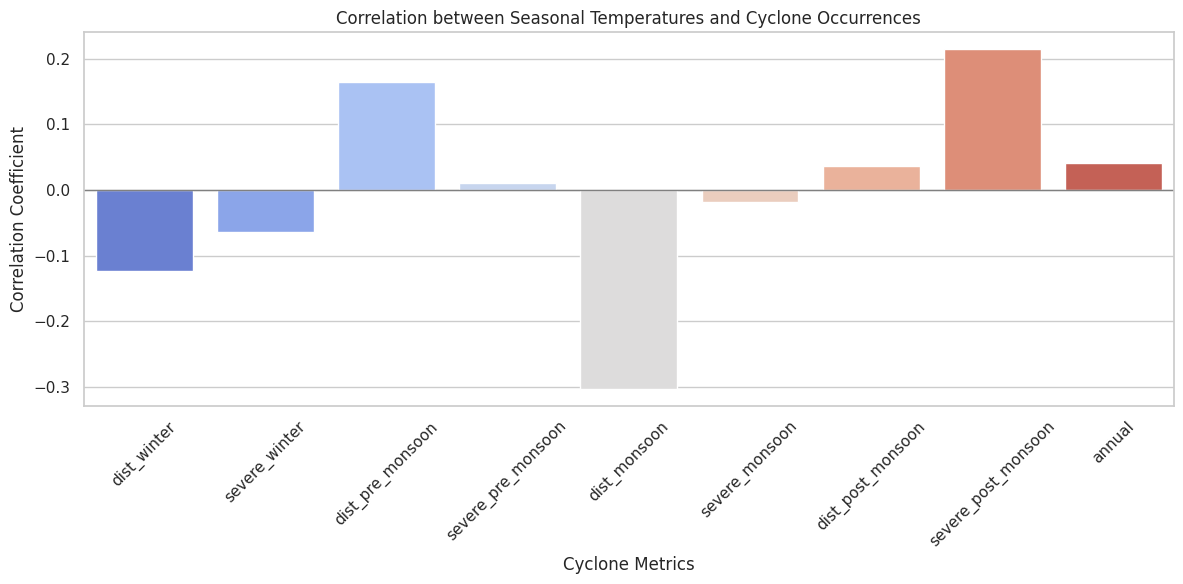

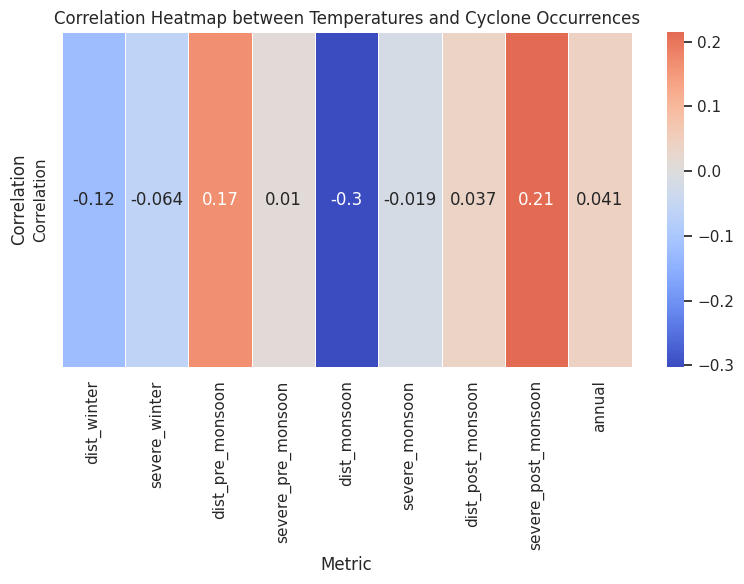

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming correlation_results is defined as follows (replace with your actual data)
# correlation_results = {
#     'dist_winter': -0.12320467012196934,
#     'severe_winter': -0.06366732929633898,
#     'dist_pre_monsoon': 0.16529479470225988,
#     'severe_pre_monsoon': 0.010417531032423932,
#     'dist_monsoon': -0.3028853792665794,
#     'severe_monsoon': -0.018521704990578213,
#     'dist_post_monsoon': 0.03654104426231661,
#     'severe_post_monsoon': 0.21451306074662874,
#     'annual': 0.04132074359377405
# }

# Convert the correlation_results dictionary to a DataFrame
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Metric', 'Correlation'])

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for correlations
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Metric', y='Correlation', data=correlation_df, palette='coolwarm')
plt.title('Correlation between Seasonal Temperatures and Cyclone Occurrences')
plt.axhline(0, color='gray', lw=1)  # Add a line at y=0 for reference
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Cyclone Metrics')
plt.tight_layout()
plt.show()

# Create a heatmap for a better visual representation
plt.figure(figsize=(8, 6))
correlation_matrix = correlation_df.set_index('Metric').T  # Transpose for heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Correlation Heatmap between Temperatures and Cyclone Occurrences')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load data from annual frequency CSV
annual_frequency_path = '/content/Cyclone_Files/annual_frequency.csv'
annual_frequency_df = pd.read_csv(annual_frequency_path)

# Load data from annual min max CSV, specifying that we need to skip the first row
annual_min_max_path = '/content/Temp_Files/annual_min_max.csv'
annual_min_max_df = pd.read_csv(annual_min_max_path, header=1)  # Use header=1 to read the correct headers

# Clean up the column names in both DataFrames to remove any leading/trailing whitespace
annual_frequency_df.columns = annual_frequency_df.columns.str.strip()
annual_min_max_df.columns = annual_min_max_df.columns.str.strip()

# Print the first few rows of both DataFrames for verification (optional)
print("Annual Frequency Data:")
print(annual_frequency_df.head())
print("\nAnnual Min Max Data:")
print(annual_min_max_df.head())

# Clean up annual_frequency_df to select relevant columns and rename 'Year' to 'YEAR'
annual_frequency_cleaned = annual_frequency_df[['Year', 'Cyclonic Disturbances - LAND', 'Severe Cyclones - LAND']]
annual_frequency_cleaned.rename(columns={'Year': 'YEAR'}, inplace=True)  # Rename column here

# Merge the cleaned DataFrames on 'YEAR'
merged_df = pd.merge(annual_frequency_cleaned, annual_min_max_df, on='YEAR')

# Rename columns for clarity in correlation analysis
merged_df.rename(columns={
    'Severe Cyclones - LAND': 'Severe Cyclones',
    'Cyclonic Disturbances - LAND': 'Cyclonic Disturbances'
}, inplace=True)

# Calculate correlations between Cyclonic Occurrence and Annual Temperature Fluctuations
# Using MIN and MAX annual temperatures
temperature_columns = ['MIN', 'MAX']  # Assuming these are the names for min and max temperature columns

# Correlation between Cyclonic Occurrences and Temperature Fluctuations
for temp_col in temperature_columns:
    # Calculate Pearson and Spearman correlations for Cyclonic Occurrences
    cyclonic_occurrence_corr_pearson = merged_df[['Severe Cyclones', temp_col]].corr(method='pearson')
    cyclonic_occurrence_corr_spearman = merged_df[['Severe Cyclones', temp_col]].corr(method='spearman')

    # Print the correlation results for Cyclonic Occurrences
    print(f"\nPearson Correlation between Severe Cyclones and {temp_col} Temperature Fluctuations:\n", cyclonic_occurrence_corr_pearson)
    print(f"\nSpearman Correlation between Severe Cyclones and {temp_col} Temperature Fluctuations:\n", cyclonic_occurrence_corr_spearman)

# Calculate correlations between Cyclonic Disturbances and Annual Temperature Fluctuations
for temp_col in temperature_columns:
    # Calculate Pearson and Spearman correlations for Cyclonic Disturbances
    cyclonic_disturbance_corr_pearson = merged_df[['Cyclonic Disturbances', temp_col]].corr(method='pearson')
    cyclonic_disturbance_corr_spearman = merged_df[['Cyclonic Disturbances', temp_col]].corr(method='spearman')

    # Print the correlation results for Cyclonic Disturbances
    print(f"\nPearson Correlation between Cyclonic Disturbances and {temp_col} Temperature Fluctuations:\n", cyclonic_disturbance_corr_pearson)
    print(f"\nSpearman Correlation between Cyclonic Disturbances and {temp_col} Temperature Fluctuations:\n", cyclonic_disturbance_corr_spearman)


Annual Frequency Data:
   Year  Cyclonic Disturbances - BOB  Cyclonic Disturbances - AS  \
0  1891                            9                           1   
1  1892                            8                           2   
2  1893                           10                           1   
3  1894                            8                           1   
4  1895                           10                           1   

   Cyclonic Disturbances - LAND  Cyclonic Disturbances - TOTAL  \
0                             3                             13   
1                             2                             12   
2                             1                             12   
3                             3                             12   
4                             0                             11   

   Cyclones - BOB  Cyclones - AS  Cyclones - LAND  Cyclones - TOTAL  \
0               2              1                1                 4   
1               5            

<ipython-input-52-da9a406fa050>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annual_frequency_cleaned.rename(columns={'Year': 'YEAR'}, inplace=True)  # Rename column here



Spearman Correlation between Severe Cyclones and MAX Temperature Fluctuations:
                  Severe Cyclones       MAX
Severe Cyclones         1.000000 -0.049459
MAX                    -0.049459  1.000000

Pearson Correlation between Cyclonic Disturbances and MIN Temperature Fluctuations:
                        Cyclonic Disturbances       MIN
Cyclonic Disturbances               1.000000 -0.160721
MIN                                -0.160721  1.000000

Spearman Correlation between Cyclonic Disturbances and MIN Temperature Fluctuations:
                        Cyclonic Disturbances       MIN
Cyclonic Disturbances               1.000000 -0.198356
MIN                                -0.198356  1.000000

Pearson Correlation between Cyclonic Disturbances and MAX Temperature Fluctuations:
                        Cyclonic Disturbances       MAX
Cyclonic Disturbances               1.000000 -0.055906
MAX                                -0.055906  1.000000

Spearman Correlation between Cyclon

In [ ]:
import statsmodels.api as sm

# Convert MIN and MAX columns to numeric, forcing errors to NaN
annual_min_max_df['MIN'] = pd.to_numeric(annual_min_max_df['MIN'], errors='coerce')
annual_min_max_df['MAX'] = pd.to_numeric(annual_min_max_df['MAX'], errors='coerce')

# Now calculate the Average Temperature
annual_min_max_df['Average_Temperature'] = (annual_min_max_df['MIN'] + annual_min_max_df['MAX']) / 2

# Merge datasets
annual_frequency_df.rename(columns={'Year': 'YEAR'}, inplace=True)
merged_df = pd.merge(annual_frequency_df, annual_min_max_df, on='YEAR')

print(merged_df.columns)
# Check the renaming step
merged_df.rename(columns={
    'annual: TOTAL': 'Annual Cyclonic Disturbances',
    'Cyclonic Disturbances - TOTAL': 'Total Cyclonic Disturbances'
}, inplace=True)

# Calculate correlations
correlations = merged_df[['Annual Cyclonic Disturbances', 'Total Cyclonic Disturbances', 'Average_Temperature']].corr()
print(correlations)


# Define the dependent and independent variables
X = merged_df['Average_Temperature']  # Independent variable
y = merged_df['Total Cyclonic Disturbances']  # Dependent variable

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


Index(['YEAR', 'Cyclonic Disturbances - BOB', 'Cyclonic Disturbances - AS',
       'Cyclonic Disturbances - LAND', 'Cyclonic Disturbances - TOTAL',
       'Cyclones - BOB', 'Cyclones - AS', 'Cyclones - LAND',
       'Cyclones - TOTAL', 'Severe Cyclones - BOB', 'Severe Cyclones - AS',
       'Severe Cyclones - LAND', 'annual: TOTAL', 'MIN', 'MAX', 'MIN.1',
       'MAX.1', 'MIN.2', 'MAX.2', 'MIN.3', 'MAX.3', 'MIN.4', 'MAX.4',
       'Average_Temperature'],
      dtype='object')
                              Annual Cyclonic Disturbances  \
Annual Cyclonic Disturbances                      1.000000   
Total Cyclonic Disturbances                       0.291743   
Average_Temperature                               0.041210   

                              Total Cyclonic Disturbances  Average_Temperature  
Annual Cyclonic Disturbances                     0.291743              0.04121  
Total Cyclonic Disturbances                      1.000000             -0.32547  
Average_Temperature        

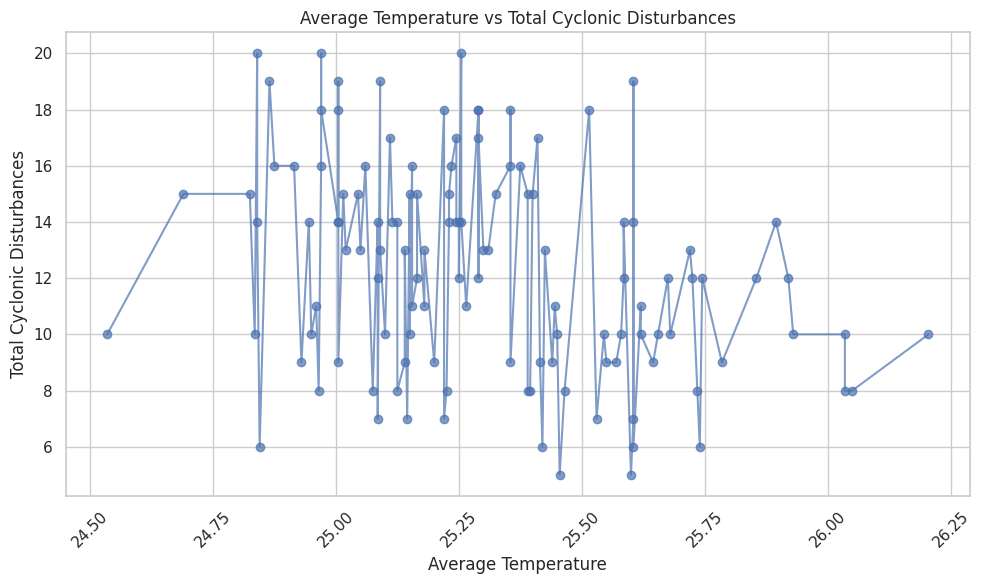

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Average Temperature for a better visual representation
merged_df_sorted = merged_df.sort_values('Average_Temperature')

plt.figure(figsize=(10, 6))
plt.plot(merged_df_sorted['Average_Temperature'], merged_df_sorted['Total Cyclonic Disturbances'], marker='o', linestyle='-', alpha=0.7)
plt.title('Average Temperature vs Total Cyclonic Disturbances')
plt.xlabel('Average Temperature')
plt.ylabel('Total Cyclonic Disturbances')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


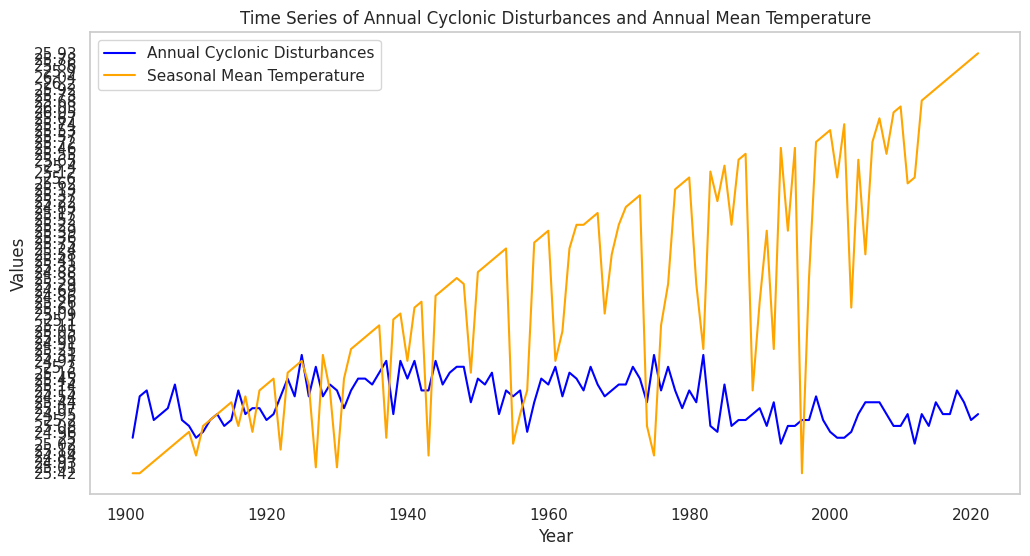

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets (replace with your actual file paths)
annual_frequency = pd.read_csv('/content/Cyclone_Files/annual_frequency.csv')
seasonal_mean = pd.read_csv('/content/Temp_Files/seasonal_mean.csv')

# Assuming the columns are named 'Year' and 'Total Cyclonic Disturbances' for annual_frequency
# and 'Year' and 'Mean Temperature' for seasonal_mean.

annual_frequency_df.rename(columns={'Year': 'YEAR'}, inplace=True)

annual_frequency['YEAR'] = pd.to_datetime(annual_frequency['Year'], format='%Y')
seasonal_mean['YEAR'] = pd.to_datetime(seasonal_mean['YEAR'], format='%Y')

# Set the 'Year' column as index
annual_frequency.set_index('YEAR', inplace=True)
seasonal_mean.set_index('YEAR', inplace=True)

# Step 2: Filter out years in annual_frequency that are not in seasonal_mean
common_years = annual_frequency.index.intersection(seasonal_mean.index)
annual_frequency_filtered = annual_frequency.loc[common_years]
seasonal_mean_filtered = seasonal_mean.loc[common_years]

# Step 3: Plotting the Time Series
plt.figure(figsize=(12, 6))

# Plotting the Annual Cyclonic Disturbances
plt.plot(annual_frequency_filtered.index, annual_frequency_filtered['Cyclonic Disturbances - TOTAL'],
         label='Annual Cyclonic Disturbances', color='blue')

# Plotting the Seasonal Mean Temperature
plt.plot(seasonal_mean_filtered.index, seasonal_mean_filtered['ANNUAL'],
         label='Seasonal Mean Temperature', color='orange')

# Adding titles and labels
plt.title('Time Series of Annual Cyclonic Disturbances and Annual Mean Temperature')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()
